In [1]:
from mxnet import nd
from time import time

In [2]:
a = nd.ones(shape=1000)
b = nd.ones(shape=1000)

start = time()

c = nd.zeros(shape=1000)
# 逐个元素相加
for i in range(1000):
    c[i] = a[i] + b[i]
time() - start

0.3275599479675293

In [4]:
# 矢量加法 >>> 普通元素逐个相加。

start = time()
d = a + b
time() - start

0.00045418739318847656

# 3.1 线性回归

In [5]:
%pylab inline

from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random



Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

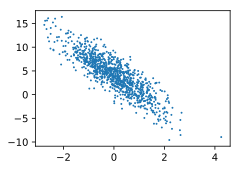

In [8]:
features[0], labels[0]

def use_svg_display():
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # set fig size
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()

plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1)

In [10]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = np.random.permutation(num_examples)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i+batch_size, num_examples)])
        yield features.take(j), labels.take(j)
        
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[ 0.20511606 -1.5177966 ]
 [-0.71065867  0.9057949 ]
 [-1.57858    -0.759265  ]
 [-0.40702567 -0.7605779 ]
 [ 1.2927808  -0.5197495 ]
 [-1.2186161   0.998053  ]
 [-0.7695718  -0.5510532 ]
 [-1.3000388   1.5999995 ]
 [ 0.16420348  0.53501797]
 [ 1.1747298   1.1240152 ]]
<NDArray 10x2 @cpu(0)> 
[ 9.785454   -0.30060866  3.621755    5.9727497   8.550262   -1.6386467
  4.542024   -3.8292062   2.6975443   2.720426  ]
<NDArray 10 @cpu(0)>


In [11]:
# 初始化权重

w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

In [13]:
w.attach_grad()
b.attach_grad()

In [14]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

In [15]:
# 定义损失函数

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2


In [22]:
# 定义优化算法

# params: 要学习的参数
# lr    : 学习率
# batch_size 批量样本

def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [19]:


lr = 0.03

num_epochs = 3

net = linreg

loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要 num_epochs 个迭代周期
    # 在每一个迭代周期中， 会使用训练模型集中 所有样本一次 （ 假设样本数据能被 batch_size 整除）
    # X, y 分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y) # l 是有关小批量X和y的损失
        l.backward()
        sgd( [w,b], lr, batch_size)
    train_l = loss(net( features, w,b), labels)
    print('epoch %d, loss %f' % (epoch + 1 , train_l.mean().asnumpy()))

epoch 1, loss 0.000048
epoch 2, loss 0.000048
epoch 3, loss 0.000049


In [20]:
true_w, w

([2, -3.4], 
 [[ 1.9988188]
  [-3.4004636]]
 <NDArray 2x1 @cpu(0)>)

In [21]:
true_b, b

(4.2, 
 [4.200223]
 <NDArray 1 @cpu(0)>)